<a href="https://colab.research.google.com/github/vaishnavipatare/Stock_Price_Prediction/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

Read complete data


In [ ]:
df=pd.read_csv('AAPL.csv')
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2022-10-31  153.160004  154.240005  151.919998  153.339996  152.435699   
1    2022-11-01  155.080002  155.449997  149.130005  150.649994  149.761566   
2    2022-11-02  148.949997  152.169998  145.000000  145.029999  144.174698   
3    2022-11-03  142.059998  142.800003  138.750000  138.880005  138.060974   
4    2022-11-04  142.089996  142.669998  134.380005  138.380005  137.792114   
..          ...         ...         ...         ...         ...         ...   
247  2023-10-25  171.880005  173.059998  170.649994  171.100006  171.100006   
248  2023-10-26  170.369995  171.380005  165.669998  166.889999  166.889999   
249  2023-10-27  166.910004  168.960007  166.830002  168.220001  168.220001   
250  2023-10-30  169.020004  171.169998  168.869995  170.289993  170.289993   
251  2023-10-31  169.350006  170.899994  167.899994  170.770004  170.770004   

        Volume  
0     97943200  
1     80379300  


Split into input(x) and output(y)


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,153.160004,154.240005,151.919998,153.339996,152.435699,97943200
1,2022-11-01,155.080002,155.449997,149.130005,150.649994,149.761566,80379300
2,2022-11-02,148.949997,152.169998,145.000000,145.029999,144.174698,93604600
3,2022-11-03,142.059998,142.800003,138.750000,138.880005,138.060974,97918500
4,2022-11-04,142.089996,142.669998,134.380005,138.380005,137.792114,140814800


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2023-10-25,171.880005,173.059998,170.649994,171.100006,171.100006,57157000
248,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.889999,70625300
249,2023-10-27,166.910004,168.960007,166.830002,168.220001,168.220001,58468600
250,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
251,2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44818700


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,153.160004,154.240005,151.919998,153.339996,97943200
1,1,155.080002,155.449997,149.130005,150.649994,80379300
2,2,148.949997,152.169998,145.000000,145.029999,93604600
3,3,142.059998,142.800003,138.750000,138.880005,97918500
4,4,142.089996,142.669998,134.380005,138.380005,140814800


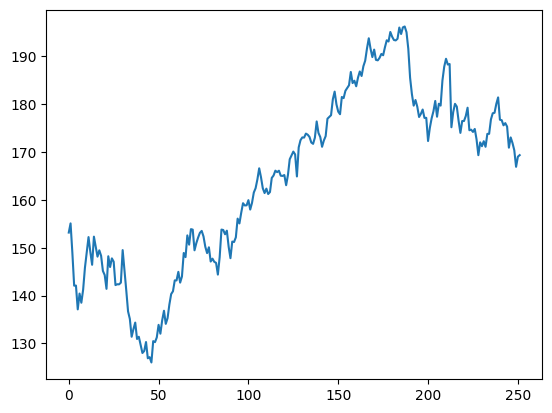

In [ ]:
plt.plot(df.Open)

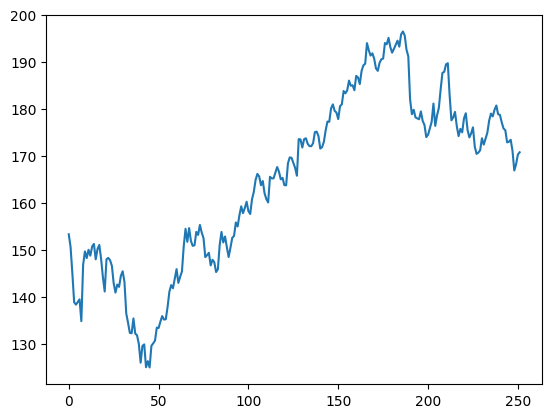

In [ ]:
plt.plot(df.Close)

In [ ]:
ma10 =df.Close.rolling(10).mean()
ma10

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
247    175.715002
248    174.333002
249    173.270001
250    172.427000
251    171.789001
Name: Close, Length: 252, dtype: float64

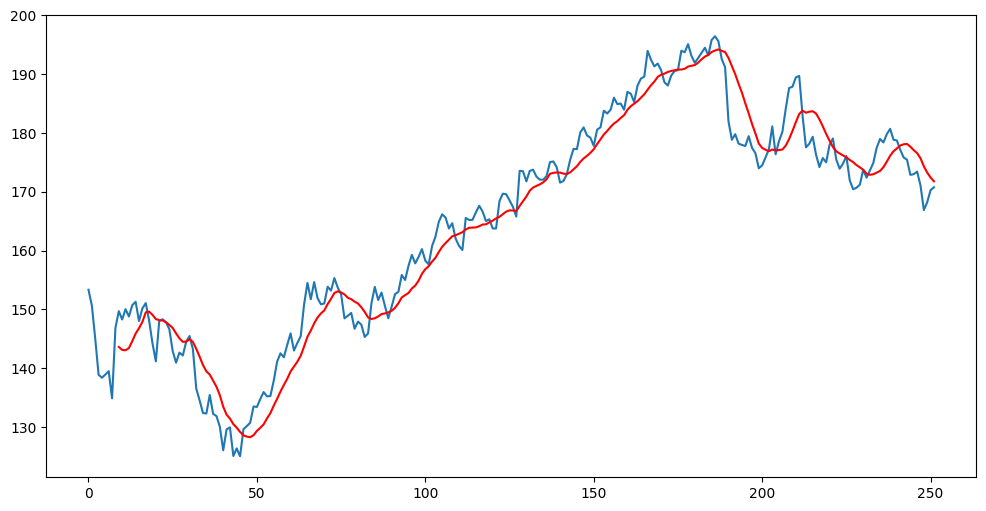

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma10,'r')

In [ ]:
ma20 =df.Close.rolling(20).mean()
ma20

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
247    175.422002
248    175.232002
249    175.082502
250    174.909502
251    174.828002
Name: Close, Length: 252, dtype: float64

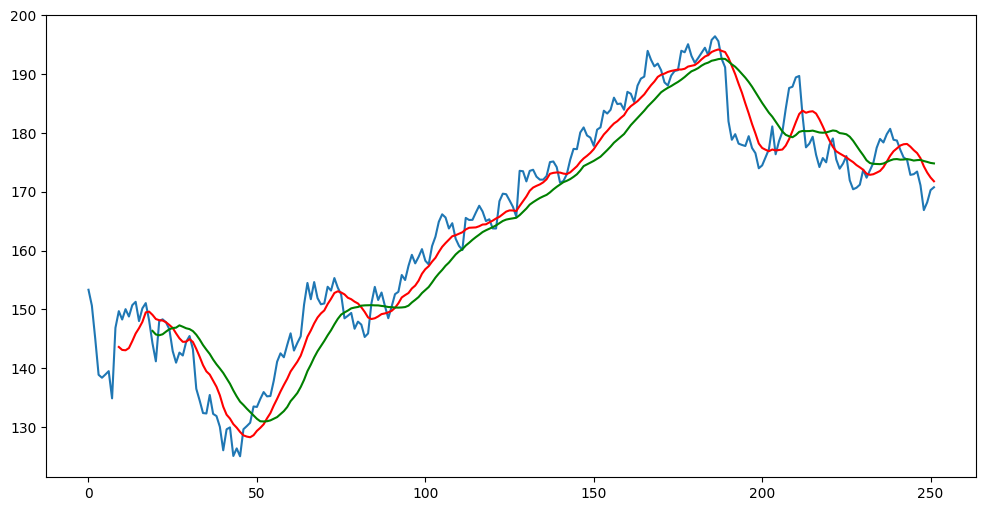

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma10,'r')
plt.plot(ma20,'g')

In [ ]:
df.shape

(252, 6)

Spliting data into training and testing


In [ ]:
d_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
d_test=pd.DataFrame(df['Close'][int (len(df)*0.70):int(len(df))])


In [ ]:
d_train.shape


(176, 1)

In [ ]:
d_test.shape

(76, 1)

In [ ]:
d_train.head()

,Close
0,153.339996
1,150.649994
2,145.029999
3,138.880005
4,138.380005


In [ ]:
d_test.head()

,Close
176,193.990005
177,193.729996
178,195.100006
179,193.130005
180,191.940002


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [ ]:
d_train_array=scaler.fit_transform(d_train)
d_train_array

array([[4.10732376e-01],
       [3.71718572e-01],
       [2.90210309e-01],
       [2.01015333e-01],
       [1.93763702e-01],
       [2.01595362e-01],
       [2.10007283e-01],
       [1.42857106e-01],
       [3.16896254e-01],
       [3.57940516e-01],
       [3.37345912e-01],
       [3.62871567e-01],
       [3.44742489e-01],
       [3.72733902e-01],
       [3.81000645e-01],
       [3.33429973e-01],
       [3.64902024e-01],
       [3.77810130e-01],
       [3.34880387e-01],
       [2.78462696e-01],
       [2.34227702e-01],
       [3.33720097e-01],
       [3.37780996e-01],
       [3.30529364e-01],
       [3.13415616e-01],
       [2.59463466e-01],
       [2.30892010e-01],
       [2.55692472e-01],
       [2.48586019e-01],
       [2.82378635e-01],
       [2.96591774e-01],
       [2.63814488e-01],
       [1.66497496e-01],
       [1.37635931e-01],
       [1.06598950e-01],
       [1.05583837e-01],
       [1.51269027e-01],
       [1.04568507e-01],
       [9.92023728e-02],
       [7.26613736e-02],


In [1]:
print("one third part of code completed")

one third part of code completed
